## Digit Recognizer

https://www.kaggle.com/c/digit-recognizer

In [17]:
pip install opencv-python

     |████████████████████████████████| 53.9 MB 1.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [83]:
%matplotlib inline
 
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
print(cv2.__version__)

4.7.0


подгружаю данные 

In [21]:
train = np.loadtxt('/Users/anastasiafedoracenko/Desktop/digit-recognizer/train.csv', delimiter = ',', skiprows = 1)
test = np.loadtxt('/Users/anastasiafedoracenko/Desktop/digit-recognizer/test.csv', delimiter = ',', skiprows = 1)

сохраняем разметку в отдельную переменную

In [30]:
train_label = train[:, 0]

приводим размерность к удобному для обаботки виду

In [35]:
train_img = np.resize(train [:, 1:], (train.shape[0],28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [36]:
train_img.shape

(42000, 28, 28)

In [37]:
test_img.shape

(28000, 28, 28)

Визуализируем исходные данные 


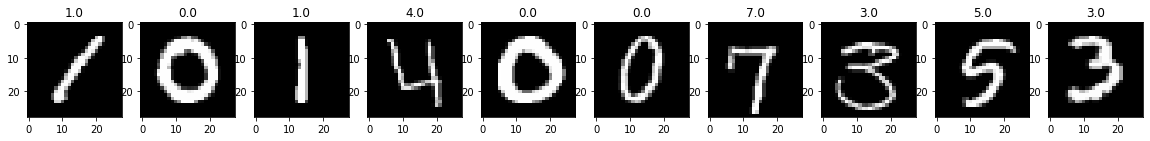

In [51]:
fig = plt.figure(figsize = (20, 15))
for i, img in enumerate(train_img[0: 10], 1):
    subplot = fig.add_subplot(1, 10, i)
    plt.imshow(img, cmap = 'gray');
    subplot.set_title('%s' % train_label[i - 1]);

Понижение размерности с помощью РСА

In [53]:
X_train = train_img.reshape(-1, 28 * 28).astype(np.float32)
X_test = test_img.reshape(-1, 28 * 28).astype(np.float32)

Центруем данные 

In [55]:
X_train_mean = X_train.mean(axis = 0)
X_train -= X_train_mean


X_test_mean = X_test.mean(axis = 0)
X_test -= X_test_mean

Матрица ковариации

In [60]:
cov_train = np.dot(X_train.T, X_train) / X_train.shape[0]

cov_test = np.dot(X_test.T, X_test) / X_test.shape[0]

Собственные вектора и значения 

In [63]:
U, S, _ = np.linalg.svd(cov_train)

U_1, S_1, _ = np.linalg.svd(cov_test)

Накопленная сумма собственных значений 

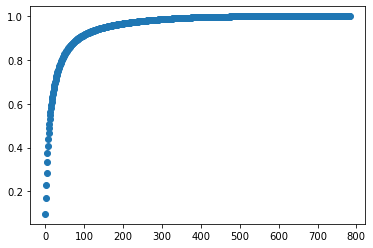

In [66]:
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

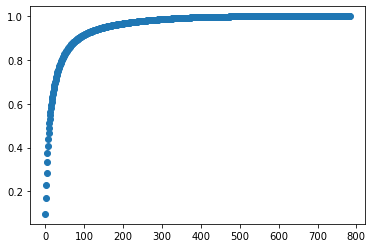

In [67]:
S_1_cumsum = np.cumsum(S_1) / np.sum(S_1)
plt.plot(S_1_cumsum, 'o')

In [68]:
for i in range(10):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.097
[001] 0.169
[002] 0.231
[003] 0.284
[004] 0.333
[005] 0.376
[006] 0.409
[007] 0.438
[008] 0.466
[009] 0.489


задаем порог для накопленной суммы собственных значений и определяем необходимое число компонент для заданного порога


In [107]:
S_thr = 0.75
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))

print('n_comp = %d, S = %.3f' % (n_comp, S_cumsum[n_comp]))

n_comp = 32, S = 0.751


Получаем сжатое представление объектов 

In [75]:
Xrot_reduced_train = np.dot(X_train, U[:, :n_comp])

Xrot_reduced_test = np.dot(X_test, U_1[:, :n_comp])

Разбиваем данную выборку на обучение и валидацию, инициализируем модель knn, обучаем и предсказываем.

In [79]:
y_train, y_val, x_train, x_val = train_test_split(train_label, Xrot_reduced_train, test_size = 0.2, random_state = 7)

In [80]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [81]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [82]:
y_pred = knn.predict(x_val)

In [102]:
accuracy_score(y_pred, y_val)

0.9689285714285715

Текущая размерность данных

In [106]:
x_train.shape

(33600, 144)

Готовим файл с предсказаниями для отправки на кагл

In [109]:
with open('submit_result.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%d\n' % (i, p))


In [111]:
!head submit_result.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0
